# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

### Importing the training set

In [2]:
dataset_train = pd.read_csv('BTC_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
x_train_5MA =  moving_average(training_set_scaled[195:,0],5) #shape: (1059,)
x_train_10MA =  moving_average(training_set_scaled[190:,0],10)
x_train_21MA =  moving_average(training_set_scaled[179:,0],21)
x_train_50MA =  moving_average(training_set_scaled[150:,0],50)
x_train_200MA = moving_average(training_set_scaled[:,0],200)


X_train = []
Y_train = []


for i in range(20, 2249): # 1258 (-198)
  # X_train_joined = np.concatenate((training_set_scaled[i-20:i,0],x_train_5MA[i-20:i],x_train_10MA[i-20:i], x_train_21MA[i-20:i], x_train_50MA[i-20:i], x_train_200MA[i-20:i]))
  # print(X_train_joined.shape) 

  X_train_joined = np.concatenate((training_set_scaled[i-20:i,0],x_train_5MA[i-20:i],x_train_10MA[i-20:i], x_train_21MA[i-20:i], x_train_50MA[i-20:i], x_train_200MA[i-20:i]), dtype=None)
  X_train.append(X_train_joined)
  Y_train.append(training_set_scaled[i, 0])

#print(type(X_train))
X_train, y_train = np.array(X_train, dtype=object), np.array(Y_train)
print(X_train.shape)

(2229, 120)


### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.25))

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.25))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.5))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [15]:
X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')

regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
70/70 [==============================] - 27s 283ms/step - loss: 0.0022
Epoch 2/10
70/70 [==============================] - 16s 233ms/step - loss: 0.0011
Epoch 3/10
70/70 [==============================] - 16s 233ms/step - loss: 8.9765e-04
Epoch 4/10
70/70 [==============================] - 16s 231ms/step - loss: 7.9657e-04
Epoch 5/10
70/70 [==============================] - 17s 243ms/step - loss: 6.2274e-04
Epoch 6/10
70/70 [==============================] - 16s 232ms/step - loss: 4.6912e-04
Epoch 7/10
70/70 [==============================] - 16s 233ms/step - loss: 4.8708e-04
Epoch 8/10
70/70 [==============================] - 17s 250ms/step - loss: 4.4082e-04
Epoch 9/10
70/70 [==============================] - 16s 232ms/step - loss: 3.2195e-04
Epoch 10/10
70/70 [==============================] - 16s 230ms/step - loss: 4.1825e-04


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [16]:
dataset_test = pd.read_csv('BTC_Test.csv', engine='python')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [17]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

ma_inputs = dataset_total[len(dataset_total) - len(dataset_test) - 200:].values
ma_inputs = ma_inputs.reshape(-1,1)
ma_inputs = sc.transform(ma_inputs)

x_test_5MA =  moving_average(ma_inputs[195:,0],5)
x_test_10MA =  moving_average(ma_inputs[190:,0],10)
x_test_21MA =  moving_average(ma_inputs[179:,0],21)
x_test_50MA =  moving_average(ma_inputs[150:,0],50)
x_test_200MA = moving_average(ma_inputs[:,0],200)

X_test = []
for i in range(20, 580):
    X_test_joined = np.concatenate((inputs[i-20:i,0],x_test_5MA[i-20:i],x_test_10MA[i-20:i], x_test_21MA[i-20:i], x_test_50MA[i-20:i], x_test_200MA[i-20:i]), dtype=None)
    X_test.append(X_test_joined)

X_test = np.array(X_test, dtype=object)
#X_test = np.stack(X_test) #Tömbök Tömbjéből 2D-s dolgozható tömmb
print(X_test[47].shape)
#print(inputs[47:67,0].shape)
#print(x_test_5MA[66:86].shape)
#print(x_test_10MA[46:66].shape)
#print(x_test_21MA[46:66].shape)
#print(x_test_50MA[46:66].shape)
#print(x_test_200MA[46:66].shape)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test = np.asarray(X_test).astype('float32')

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(120,)
18/18 [==============================] - 4s 127ms/step


### Visualising the results

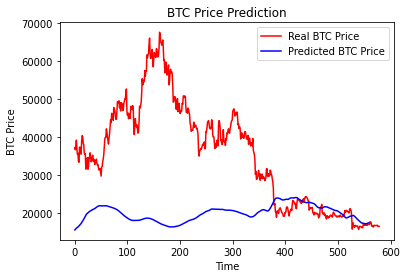

In [18]:
plt.plot(real_stock_price, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('BTC Price')
plt.legend()
plt.show()